Using COAsT to compute the Empirical Orthogonal Functions (EOFs) of your data

### Relevant imports and filepath configuration

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Begin by importing coast and other packages
import coast
import xarray as xr
import matplotlib.pyplot as plt

# Define some file paths
root = "../../"
dn_files = root + "./example_files/"

fn_nemo_dat_t = dn_files + "nemo_data_T_grid.nc"
fn_nemo_dom   = dn_files + "coast_example_nemo_domain.nc"
fn_nemo_config = root + "./config/example_nemo_grid_t.json"

### Loading data

In [5]:
# Load data variables that are on the NEMO t-grid

nemo_t = coast.Gridded( fn_data = fn_nemo_dat_t, fn_domain = fn_nemo_dom, config = fn_nemo_config )

### Compute EOF

For a variable (or subset of a variable) with two spatial dimensions and one temporal dimension, i.e. (x,y,t), the EOFs, temporal projections and variance explained can be computed by calling the ‘eofs’ method, and passing in the ssh DataArray as an argument. For example, for the sea surface height field, we can do

In [6]:
eof_data = coast.compute_eofs( nemo_t.dataset.ssh )

The method returns an xarray dataset that contains the EOFs, temporal projections and variance as DataArrays

In [7]:
#eof_data  # uncomment to print data object summary

### Inspect EOFs
The variance explained of the first four modes is

In [8]:
# eof_data.variance.sel(mode=[1,2,3,4])  ## uncomment

### Plotting
And the EOFs and temporal projections can be quick plotted:

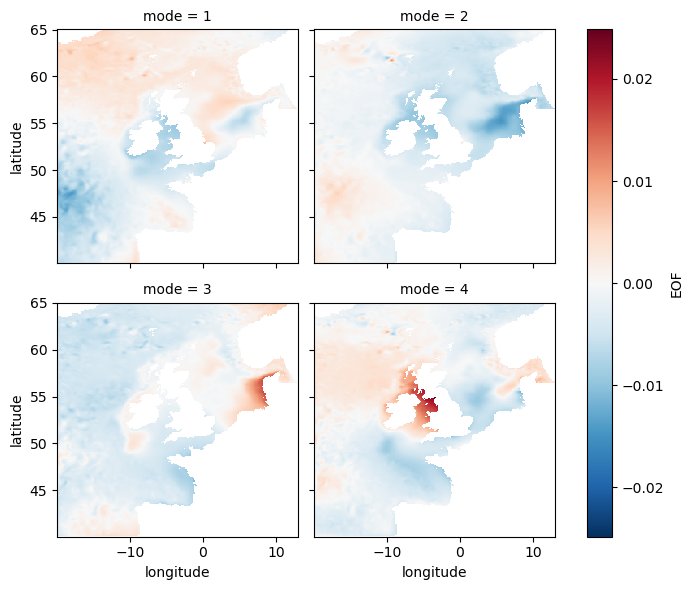

In [9]:
eof_data.EOF.sel(mode=[1,2,3,4]).plot.pcolormesh(col='mode',col_wrap=2,x='longitude',y='latitude')

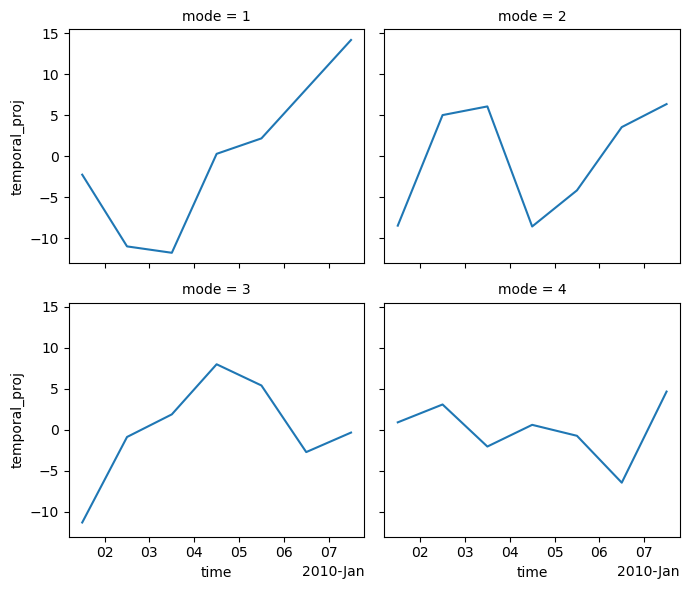

In [10]:
eof_data.temporal_proj.sel(mode=[1,2,3,4]).plot(col='mode',col_wrap=2,x='time')

### Complex EOFs
The more exotic hilbert complex EOFs can also be computed to investigate the propagation of variability, for example:

In [11]:
heof_data = coast.compute_hilbert_eofs( nemo_t.dataset.ssh )
#heof_data # uncomment to print data object summary

now with the modes expressed by their amplitude and phase, the spatial propagation of the variability can be examined through the EOF_phase.
